In [1]:
#import pymks
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/home/sushil/anaconda3/envs/env_adi/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/sushil/anaconda3/envs/env_adi/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


### Changing the image from png/dat file to numpy array

In [15]:
image_path ='/home/sushil/Desktop/adithya/c=0.4/output/ascii/time_000056000.dat'
img_ = corr.dat_to_numpy(image_path)




## Visualizing the microstructure(cropped if png)

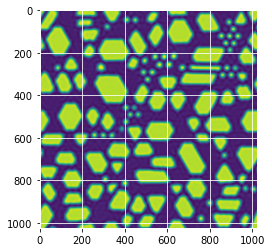

In [16]:
plt.imshow(img_)
plt.show()

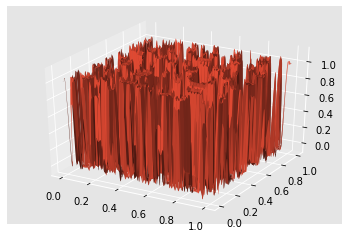

In [19]:
x = np.linspace(0, 1, img_.shape[0])
y = np.linspace(0, 1,img_.shape[1])
xv, yv = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dem3d=ax.plot_surface(xv,yv,img_)
plt.show()

## Binarize array

In [20]:
img_binary = corr.binarize_image_dat(img_)
img_binary = img_binary.astype(np.double)
img_binary.shape

(1024, 1024)

# Correlation plots obtained by using PYMKS library

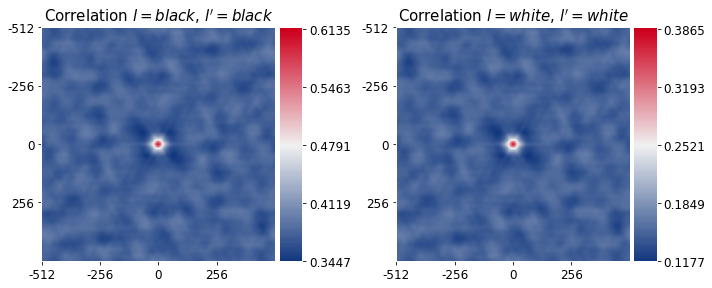

In [21]:
# Auto Correlation

auto_pymks =corr.auto_corr_from_pymks(img_binary)


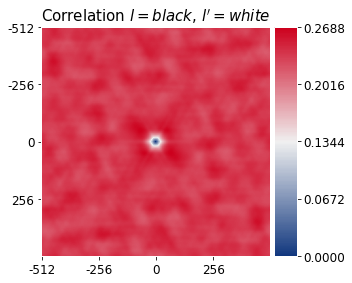

In [22]:
# Cross Correlation

cross_pymks =corr.cross_corr_from_pymks(img_binary)

# Plots obtained by self built CODE

white-white


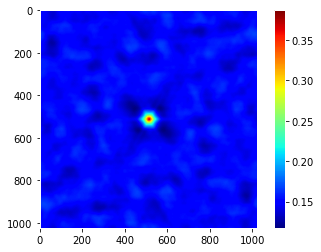

black-black


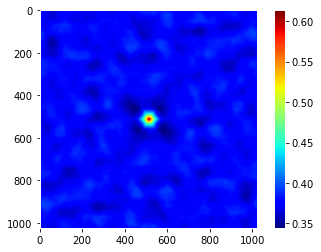

In [23]:
# AutoCorrelations

white_stats, black_stats = corr.auto_corr_from_code(img_binary)
print('white-white')
plt.imshow(white_stats, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

print('black-black')
plt.imshow(black_stats, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

black-white


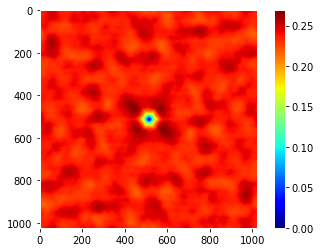

In [24]:
# Cross Correlations

cross = corr.cross_corr_from_code(img_binary)
print('black-white')
plt.imshow(cross, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

In [25]:
np.min(cross.flatten())

1.3877787807814457e-17

In [26]:
cross_flat = (cross[512])
cross_pymks_flat = (cross_pymks[0][512].flatten())

## Plotting 2 point stats accross all vectors

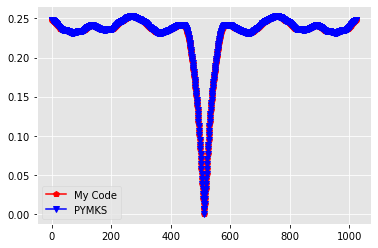

In [27]:
plt.plot(cross_pymks_flat,'r',marker = 'p')
plt.plot(cross_flat,'b',marker = 'v')
plt.legend(['My Code','PYMKS'])


## Showing close up view to verify that there is no deviation

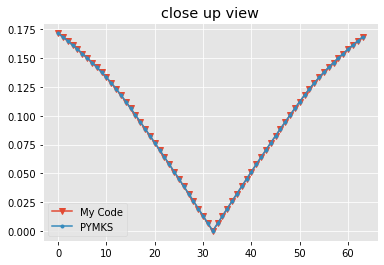

In [28]:
cross_flat = (cross[512])[480:544]
cross_pymks_flat = (cross_pymks[0][512].flatten())[480:544]
plt.plot(cross_pymks_flat,marker ='v')
plt.plot(cross_flat,marker ='.')
plt.title("close up view")
plt.legend(['My Code','PYMKS'])


# Radial Destribution Probability

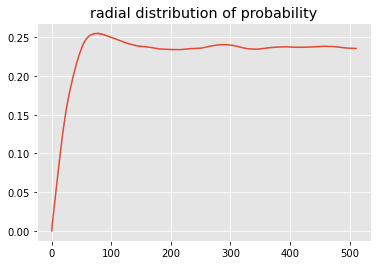

From outputs of my code


In [29]:
## From my code

r_val =corr.radialDistribution(cross)
plt.plot(r_val)
plt.title("radial distribution of probability")
plt.show()

reshaped_from_pymks = np.reshape(cross_pymks.flatten(),cross.shape)
print('From outputs of my code')

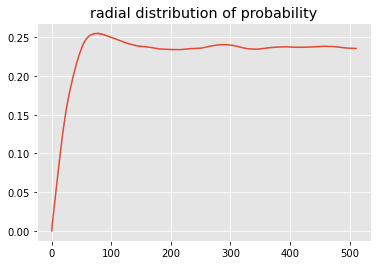

From outputs of PyMKS


In [30]:
## From PYMKS

r_val_pymks = corr.radialDistribution(reshaped_from_pymks)
plt.plot(r_val_pymks)
plt.title("radial distribution of probability")
plt.show()
print('From outputs of PyMKS')

# Getting radially distributed prob between 2 angles

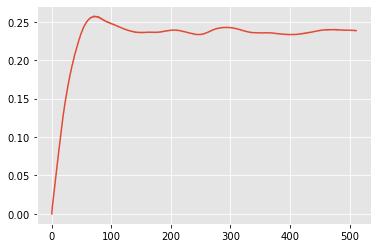

In [31]:
AngleChosenForOutput, radialProbDistribution =corr.giveAvailablePoints(cross,0,60,0)
plt.plot(radialProbDistribution)
plt.show()

Text(0.5, 1.0, 'Angles Chosen')

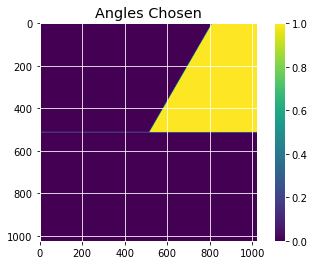

In [32]:
plt.imshow(AngleChosenForOutput)
plt.colorbar()
plt.title('Angles Chosen')

## Show radial distribution between 2 mirror regions

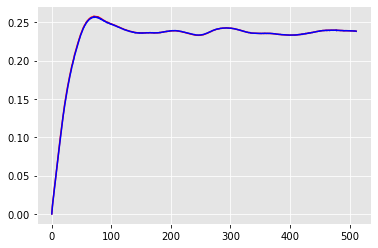

In [33]:
AngleChosenForOutput1, radialProbDistribution1 =corr.giveAvailablePoints(cross,180,240,0)
AngleChosenForOutput2, radialProbDistribution2 =corr.giveAvailablePoints(cross,0,60,0)

plt.plot(radialProbDistribution1,'r')
plt.plot(radialProbDistribution2,'b')
plt.show()


## Show radial distribution between 2 non-mirror regions

In [34]:
AngleChosenForOutput1, radialProbDistribution1 =corr.giveAvailablePoints(cross,0,60,0)
AngleChosenForOutput2, radialProbDistribution2 =corr.giveAvailablePoints(cross,30,90,0)


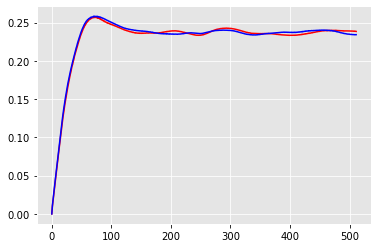

In [35]:
plt.plot(radialProbDistribution1,'r')
plt.plot(radialProbDistribution2,'b')
plt.show()

In [36]:
img_[250:500,250:500]

array([[ 3.304279e-03, -2.310426e-04, -3.160671e-03, ...,  3.749802e-01,
         3.411103e-01,  3.054819e-01],
       [ 3.092727e-03, -5.839281e-04, -3.586910e-03, ...,  3.164002e-01,
         2.863337e-01,  2.548588e-01],
       [ 3.271043e-03, -4.950987e-04, -3.540319e-03, ...,  2.612052e-01,
         2.350273e-01,  2.077542e-01],
       ...,
       [ 1.000291e+00,  1.002832e+00,  1.005538e+00, ...,  1.622072e-02,
         1.509121e-02,  1.347432e-02],
       [ 1.000355e+00,  1.002961e+00,  1.005725e+00, ...,  1.379991e-02,
         1.300961e-02,  1.172419e-02],
       [ 1.000535e+00,  1.003224e+00,  1.006075e+00, ...,  1.192906e-02,
         1.151237e-02,  1.059858e-02]])